In [1]:
#import the important library
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, datasets, models

In [2]:
#load the datasets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
#print the shape of the X_train
X_train.shape

(50000, 32, 32, 3)

In [4]:
#print shape of X_test
X_test.shape

(10000, 32, 32, 3)

In [5]:
#print first value X_train
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

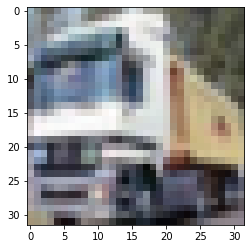

In [6]:
#plot the 2nd images of the X_train
plt.imshow(X_train[1])

In [7]:
#plot the shape of the y_train
y_train.shape

(50000, 1)

In [8]:
#print the shape of the y_test
y_test.shape

(10000, 1)

We shaw that the size of y_train is 2D arrays , but we know that one array is enough for our classification problems.

so convert the 2D arrays in 1D arrays

In [9]:
#reshape y_train in 1D array
y_train = y_train.reshape(-1)

In [10]:
#print the shape of the y_train
y_train.shape

(50000,)

In [11]:
#define the class 
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
#plot the sample images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) # set the fig size
    plt.imshow(X[index]) #define the index 
    plt.xlabel(classes[y[index]]) # plot the indexes on the images

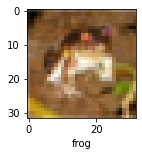

In [13]:
# plot the sample image at index 0 of the sample images
plot_sample(X_train, y_train, 0) 

In [14]:
#Normalize the X_train and X_test
# for normalization divide the X_train and X_test by maximum number of the pixels
# since we have maximum pixels is 255
# so we divide X_train and X_test by 255
X_train = X_train/255
X_test = X_test /255

#Create an ANN models 

In [15]:
#create Artificial Neural Networks
model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # This is input Layers which is flatten which accept by shape(32,32,3)
        layers.Dense(3000, activation='relu'), #hidden layers which having 30000 neurons
        layers.Dense(1000, activation='relu'), #second hidden layers which having 1000 neurons 
        layers.Dense(10, activation='sigmoid')    #output layers which having 10 neurons becouse we have ten catogories
    ])

#complile the layers
# categorical cross entropy means we select all output layers whenever we only one output but sparse categorical croosentropy select only one output layers which having output
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#train the models
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.9245 - accuracy: 0.3088
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6405 - accuracy: 0.4236
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5535 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4839 - accuracy: 0.4745
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4363 - accuracy: 0.4930


Using ANN we can see that we very low Accuracy ,

lets apply CNN

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
#predict the values
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
#plot the classification report
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.31      0.42      1000
           1       0.67      0.46      0.55      1000
           2       0.27      0.62      0.38      1000
           3       0.44      0.17      0.25      1000
           4       0.51      0.28      0.36      1000
           5       0.42      0.35      0.38      1000
           6       0.50      0.57      0.53      1000
           7       0.61      0.50      0.55      1000
           8       0.42      0.81      0.55      1000
           9       0.56      0.51      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



#Create A CNN Models

In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),    #input layers , filter_size = 3*3, , 
    layers.MaxPooling2D((2, 2)),    #pooling is use to reduce the dimenssion of the images
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),  #input layers
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'), #only one hidden layers
    layers.Dense(10, activation='softmax') # output layers
])

In [21]:
#compile the models
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
#train the models
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3868 - accuracy: 0.5129
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3473 - accuracy: 0.5270
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3131 - accuracy: 0.5401
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2782 - accuracy: 0.5513
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2491 - accuracy: 0.5615
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2192 - accuracy: 0.5744
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1908 - accuracy: 0.5851
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1636 - accuracy: 0.5936
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1384 - accuracy: 0.6009
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.111

we can see that our model's accuracy is not too much good so we again the models with 30 epochs

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
model.fit(X_train, y_train, epochs= 30)

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0831 - accuracy: 0.6226
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0577 - accuracy: 0.6304
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0333 - accuracy: 0.6413
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0046 - accuracy: 0.6507
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9798 - accuracy: 0.6608
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9556 - accuracy: 0.6685
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9312 - accuracy: 0.6785
Epoch 8/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9038 - accuracy: 0.6871
Epoch 9/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8809 - accuracy: 0.6946
Epoch 10/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.854

Now we can see that we have 87% accuracy

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
#evaluate the models
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3110 - accuracy: 0.1233


[2.3127901554107666, 0.12160000205039978]

In [29]:
#predict the values
y_pred = cnn.predict(X_test)
#print the first five predicted values
y_pred[:5]

array([[0.08757006, 0.09258561, 0.11041675, 0.10040266, 0.10709285,
        0.08288677, 0.1195731 , 0.09570051, 0.09120599, 0.11256562],
       [0.08133816, 0.09428383, 0.11498   , 0.0973837 , 0.09813489,
        0.08061193, 0.12224884, 0.09880774, 0.0967763 , 0.11543468],
       [0.08320301, 0.09320762, 0.1111811 , 0.10178874, 0.10844567,
        0.08017576, 0.11685112, 0.09338659, 0.09461106, 0.11714932],
       [0.08661428, 0.09178227, 0.11029088, 0.0946734 , 0.10339793,
        0.08323788, 0.11843333, 0.09903479, 0.09405175, 0.11848345],
       [0.08913495, 0.09465994, 0.10643774, 0.0921123 , 0.10019889,
        0.0908652 , 0.11654619, 0.10122201, 0.09387495, 0.11494783]],
      dtype=float32)

In [30]:
#convert the predicted values in to numbers
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 6, 9, 9, 6]

In [31]:

y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

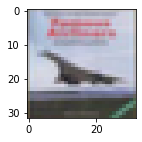

In [32]:
#plot the sample image at index 3
plot_sample(X_test, y_test,3)

In [33]:
#print the predicted values at index 3
classes[y_classes[3]]

'truck'